# Clustering for DLPFC dataset

In [1]:
import stSCI
import scanpy as sc
import st_datasets as stds

## Data preprocessing

Load the SC and ST data first. First, we load the `.h5ad` file, then normalize and log-transform the raw gene expression data.

In [ ]:
sc_adata = sc.read_h5ad('data/DLPFC/human_MTG_snrna_norm_by_exon.h5ad')
sc.pp.normalize_total(sc_adata, target_sum=1e4)
sc.pp.log1p(sc_adata)

We introduce [st_datasets](https://github.com/hannshu/st_datasets.git), an open-source Python package designed to facilitate the processing of ST data. This toolkit includes functionalities for handling commonly used datasets, metrics, and plotting tools etc.. Users can easily load the DLPFC dataset using the st_datasets package. We invite and encourage users to actively utilize and contribute to the st_datasets package to enhance its capabilities and utility.

In [3]:
st_adata, _ = stds.get_data(stds.get_dlpfc_data, id='151673')

>>> INFO: Use local data.
>>> INFO: dataset name: dorsolateral prefrontal cortex (DLPFC), slice: 151673, size: (3639, 33538), cluster: 7.(0.369s)


## Model training

We use the function `stSCI.train()` function to learn the representation.  
For downstream clustering analysis, users can enable clustering by setting the `clustering` parameter to `True`. The resulting clusters will be saved in `st_adata.obs['cluster_result']`. By default, we use the `mclust` method for clustering. Users are required to provide the ground truth ST labels in `st_adata.obs['cluster']` to determine the number of clusters. Additionally, we support the `Louvain` method for clustering when ground truth labels are not available.

In [4]:
sc_adata, st_adata = stSCI.train(sc_adata, st_adata, cluster_key='class_label', clustering=True)

>>> INFO: Filtered 445 genes.
>>> INFO: Find 2555 same HVGs, result data shapes: [(47432, 2555), (3639, 2555)].
>>> INFO: Generate 25473 edges, 6.000 edges per spot (0.01s).
>>> INFO: Finish PCA (3.66s).
>>> INFO: Finish centroid generation (2.89s).
>>> INFO: Finish centroid generation (0.07s).


>>> Train stSCI: 100%|██████████| 500/500 [01:37<00:00,  5.13it/s]
R[write to console]: Package 'mclust' version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



>>> INFO: Train stSCI model (121.66s).


## Evaluation

The `st_datasets` package provides function for calculating the ARI and NMI score.

In [5]:
df = st_adata.obs.dropna()
ari_score = stds.metrics.cal_ARI(df["cluster"], df["cluster_result"])
nmi_score = stds.metrics.cal_NMI(df["cluster"], df["cluster_result"])
print(f'>>> ARI: {ari_score:.3f}, NMI: {nmi_score:.3f}')

>>> ARI: 0.599, NMI: 0.704


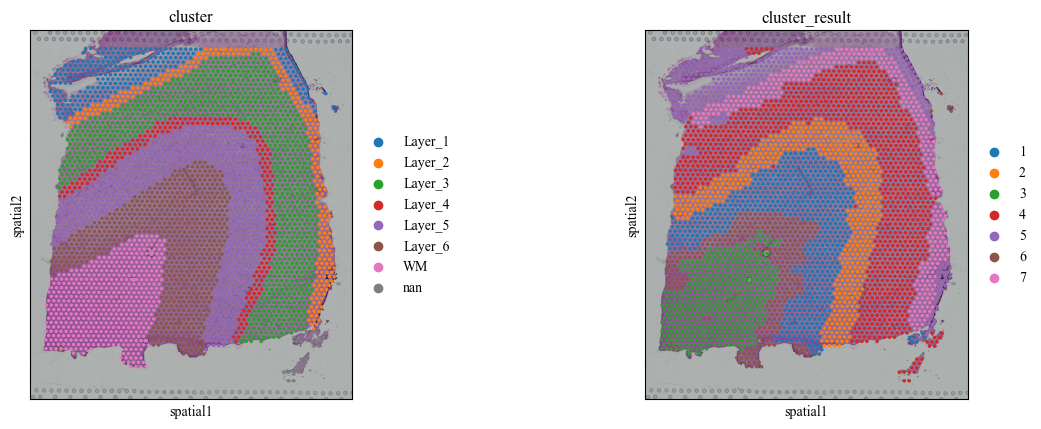

In [6]:
sc.pl.spatial(st_adata, color=['cluster', 'cluster_result'])